## 📦 Importing Libraries

We start by importing the necessary libraries:

- `os` – for handling file paths  
- `numpy` – for numerical operations  
- `pandas` – for working with data in table form  
- `matplotlib.pyplot` – for plotting images and data  
- `cv2` – for image processing  
- `sklearn` – for splitting data, training the model, and checking accuracy


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 🗂️ Setting Things Up

Here we define the basics:

- `base_path` – the main folder where all the brain images are stored  
- `folders` – subfolders for training and testing data  
- `tumor_classes` – types of brain tumors we want to detect  
- `classes` – a mapping: 0 means no tumor, 1 means any type of tumor  
- `img_size` – the size we’ll resize all images to (128x128)


In [2]:
# Define path and classes
base_path = 'brain_tumor' 
folders = ['Training', 'Testing']
tumor_classes = ['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 1, 'glioma_tumor': 1}
img_size = (128, 128)

## 🖼️ Loading Brain Scans Like a Pro

Time to dig into the brain scan archives!

- We explore both the `Training` and `Testing` folders.
- For each class (tumor types + no tumor), we open the image files.
- Images are read in **grayscale** – because color isn’t important here.
- We **resize** each image to 128x128 pixels to keep things consistent.
- Clean images go into `X` (the data), and their labels go into `Y`.
- If an image misbehaves (can't be read), we quietly skip it. No drama.

In [3]:
# Data containers
X, Y = [], []

# Load and preprocess images
for folder in folders:
    for cls in classes:
        folder_path = os.path.join(base_path, folder, cls)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = cv2.imread(img_path, 0)  # Grayscale
                img = cv2.resize(img, img_size)
                X.append(img)
                Y.append(classes[cls])
            except:
                continue  # Skip unreadable files

In [4]:
# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Check distribution
print("Class distribution:\n", pd.Series(Y).value_counts())
print("Image shape:", X.shape)

Class distribution:
 1    2764
0     500
Name: count, dtype: int64
Image shape: (3264, 128, 128)


## Example Image
To test if things work

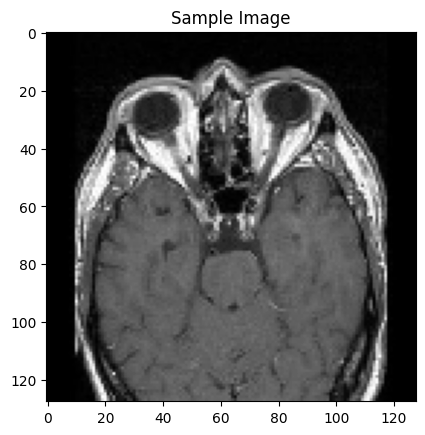

In [5]:
# Show a sample image
plt.imshow(X[0], cmap='gray')
plt.title("Sample Image")
plt.show()

## 🧹 Flattening and Normalizing – Keeping It Clean

Before feeding the images to our model, we give them a little makeover:

- **Flatten** each image: turn 2D pixels into 1D rows – like unrolling a rug.
- **Normalize** pixel values to a range between 0 and 1 by dividing by 255.

This makes the data easier to work with and helps the model learn better!


In [11]:
# Flatten and normalize
X_flat = X.reshape(len(X), -1) / 255.0
print("Flattened data shape:", X_flat.shape)

Flattened data shape: (3264, 16384)


## ✂️ Splitting the Data – Who Trains, Who Tests?

Now it's time to divide and conquer:

- We split the data: **80% for training**, **20% for testing**.
- This helps us train the model on one part and evaluate it on another.
- `random_state=42` makes the split reproducible (because science 💫).


In [ ]:
# Train/test split 20% is for testing
xtrain, xtest, ytrain, ytest = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

## 🚀 Training the Model – Time to Teach!

We’re ready to train our model:

- We use **Logistic Regression**, our trusty classifier.
- `max_iter=1000` ensures it gets enough time to learn the patterns in the data.
- The model gets trained on our **training data** (`xtrain` and `ytrain`).

Now, let's see what it has learned!


In [15]:
# Train models
lg = LogisticRegression(max_iter=1000)

lg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

### 📊 Model Evaluation – How Did It Perform?

Let’s check how our **Logistic Regression** model did:

- **Training Accuracy**: 100%
- **Testing Accuracy**: 94%

These results show us how well the model is performing on both the training data (what it learned) and the testing data (how it generalizes).


In [16]:
# Evaluate models
print("Logistic Regression - Train Accuracy:", lg.score(xtrain, ytrain))
print("Logistic Regression - Test Accuracy:", lg.score(xtest, ytest))

Logistic Regression - Train Accuracy: 1.0
Logistic Regression - Test Accuracy: 0.9402756508422665


### 💾 Saving the Model – It's Ready for the Future! (optional)

If we want to use our trained model later, we **save** it:

- We use **`joblib`** to store the **Logistic Regression** model.
- The model is saved as **`tumor_classifier.pkl`** — so it’s ready for action anytime!

No need to retrain it every time — just load and predict! 🔮


In [ ]:
import joblib

joblib.dump(lg, 'tumor_classifier.pkl') 


['tumor_classifier.pkl']